In [32]:
# CS 181, Spring 2016
# Homework 4: Clustering
# Name:
# Email:

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random as random
%matplotlib inline

class KMeans(object):
    # K is the K in KMeans
    # useKMeansPP is a boolean. If True, you should initialize using KMeans++
    def __init__(self, K, useKMeansPP):
        self.K = K
        self.useKMeansPP = useKMeansPP

    # img is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, img):
        K = self.K
        X = img
        N = len(X)
        
        # implement K means ++ algorithm for centroid initialization
        if self.useKMeansPP:
            
            # fill in first centroid w/ a random sample
            centroids = [random.sample(pics, 1)[0]]

            # loop to fill remaining centroids
            for k in range(1, K):

                # initialize the distances
                d = np.zeros(N)
                # loop over each image
                for i in range(N):
                    # calculate the distance between clusters
                    dist = []
                    for c in centroids:
                        dist.append((np.linalg.norm(pics[i]-c))**2)
                    # add the minimum distance to the d vector
                    d[i] = dist[np.argmin(dist)]

                # use d vector to calculate probability for each n
                probs = np.zeros(N)
                d_sum = np.sum(d)
                for i in range(N):
                    probs[i] = d[i]/d_sum

                # add new centroid to centroids based on probability
                r = random.uniform(0, 1)
                s = 0
                for item, prob in zip(pics, probs):
                    s += prob
                    if s >= r:
                        break
                centroids.append(item)
        
        # alternative centroid initialization
        else:
            centroids = []
            for k in range(K):
                centroids.append(random.sample(pics, 1)[0])
        
        # K means algorithm
        
        # For use in plotting objective function
        objectives = []
        
        # initialize vector for centroid labels
        labels = np.zeros(N)

        # start counter to break when algorithm converges
        removed = 1
        while removed != 0:
            removed = 0

            # loop over each image
            for i in range(N):

                # calculate the distance between n and all centroids
                dist = []
                for j in range(K):
                    dist.append((np.linalg.norm(X[i]-centroids[j]))**2)
                closest = np.argmin(dist)

                # change the label on the image if there is a closer centroid
                if labels[i] != closest:
                    labels[i] = closest
                    removed += 1

            # loop over the clusters and calculate new centroids
            for j in range(K):
                count = 0
                values = np.zeros([28,28])
                for i in range(N):
                    if labels[i] == j:
                        count += 1
                        values += X[i]
                centroids[j] = values/count
            
            # calculate objective
            objective = 0
            for n in range(N):
                for k in range(K):
                    if labels[n] == k:
                        objective += (np.linalg.norm(X[n]-centroids[k]))**2
            
            objectives.append(objective)
        
        self.X = X
        self.labels = labels
        self.centroids = centroids
        self.objectives = objectives
        
    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        centroids = self.centroids
        create_image_from_array(centroids)
        pass

    # This should return the arrays for D images from each cluster that are representative of the clusters.
    def get_representative_images(self, D, figsize):
        X = self.X
        centroids = self.centroids
        labels = self.labels
        N = len(X)
        
        c_reps = []
        
        for k in range(K):
            
            representatives = []

            potential = []
            distance = []

            for n in range(N):
                if labels[n] == k:
                    distance.append((np.linalg.norm(X[n]-centroids[k]))**2)
                    potential.append(n)

            for d in range(D):        
                closest = np.argmin(distance)
                n = potential[closest]
                representatives.append(X[n])
                del potential[closest]
                del distance[closest]
        
            c_reps.append(np.asarray(representatives))
        
        c_reps = np.reshape(np.asarray(c_reps), (K*D,28,28))
        
        figure, axes = plt.subplots(ncols=D, nrows=K, figsize=figsize, tight_layout=True)
        for (i, ax) in enumerate(axes.ravel()):
            ax.imshow(c_reps[i], cmap='Greys_r')
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
        return

    # img_array should be a 2D (square) numpy array.
    # Note, you are welcome to change this function (including its arguments and return values) to suit your needs. 
    # However, we do ask that any images in your writeup be grayscale images, just as in this example.
    def create_image_from_array(self, img_array):
        K = len(img_array)
        figure, axes = plt.subplots(ncols=K/2, nrows=2, figsize=(2*K, 8), tight_layout=True)
        for (i, ax) in enumerate(axes.ravel()):
            ax.imshow(img_array[i], cmap='Greys_r')
        return
    
    def plot_objective_function(self):
        plt.plot(range(len(self.objectives)), self.objectives)
        plt.xlabel("Iterations")
        plt.ylabel("Objective Function Value")
        plt.title("K = %d" %self.K)
        pass

# This line loads the images for you. Don't change it! 
pics = np.load("images.npy", allow_pickle=False)

# K = 10, D = 10

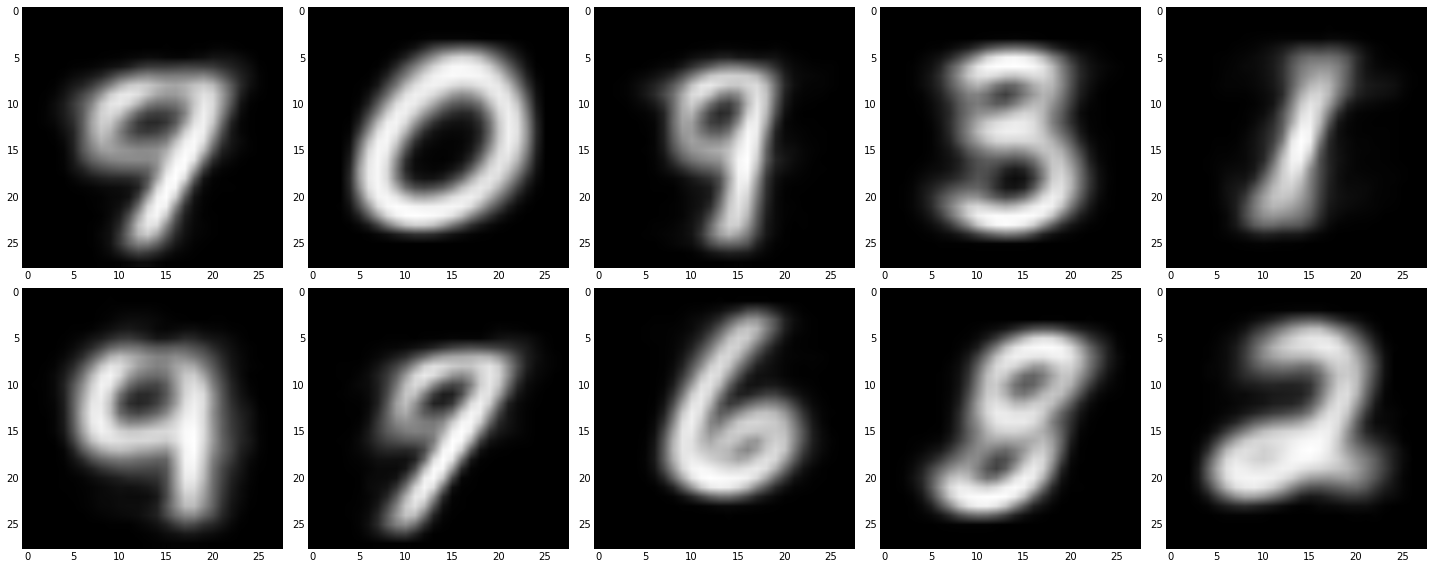

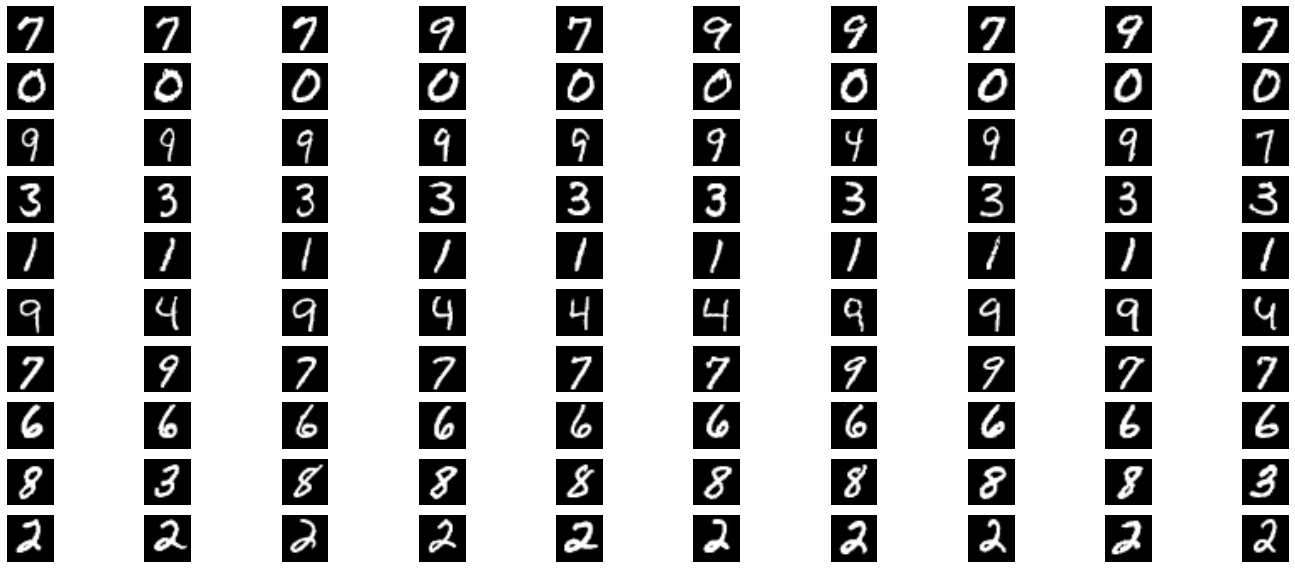

In [20]:
# You are welcome to change anything below this line. This is just an example of how your code may look.
# That being said, keep in mind that you should not change the constructor for the KMeans class, 
# though you may add more public methods for things like the visualization if you want.
# Also, you must cluster all of the images in the provided dataset, so your code should be fast enough to do that.
K = 10
D = 10
KMeansClassifier = KMeans(K=K, useKMeansPP=True)
KMeansClassifier.fit(pics)
KMeansClassifier.create_image_from_array(KMeansClassifier.centroids)
KMeansClassifier.get_representative_images(D=D, figsize = (2*K, 8))

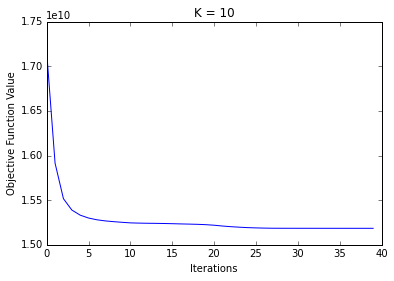

In [21]:
plt.plot(range(len(KMeansClassifier.objectives)), KMeansClassifier.objectives)
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("K = %d" %KMeansClassifier.K)
plt.show()

# K = 2, D = 10

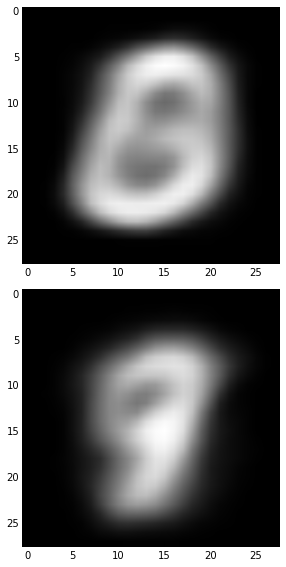

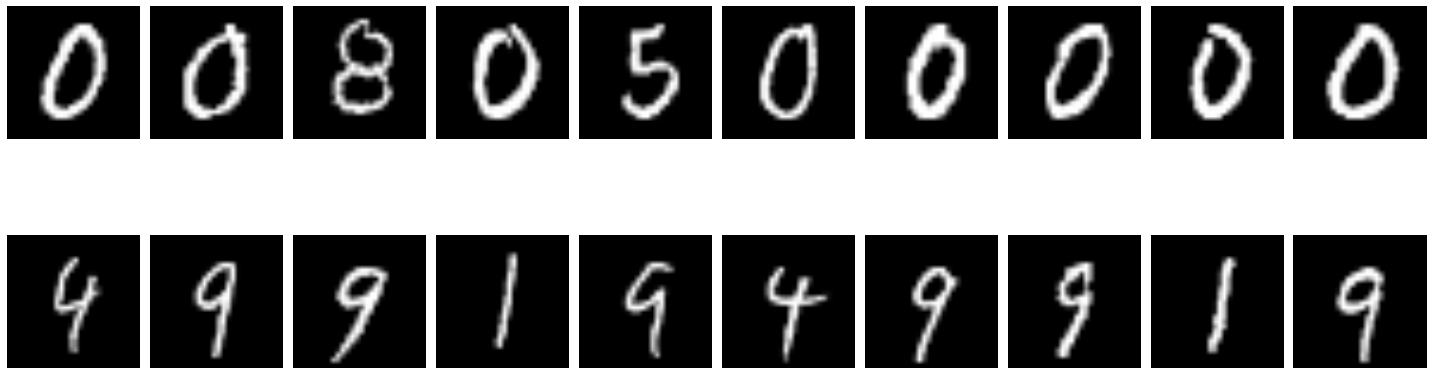

In [22]:
K = 2
D = 10
KMeansClassifier = KMeans(K=K, useKMeansPP=True)
KMeansClassifier.fit(pics)
KMeansClassifier.create_image_from_array(KMeansClassifier.centroids)
KMeansClassifier.get_representative_images(D=D, figsize = (2*D, 8))

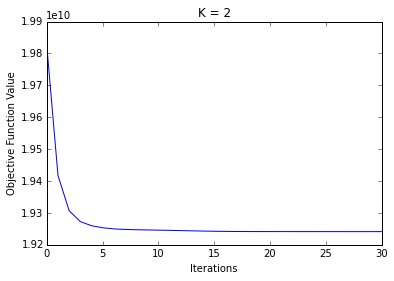

In [23]:
plt.plot(range(len(KMeansClassifier.objectives)), KMeansClassifier.objectives)
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("K = %d" %KMeansClassifier.K)
plt.show()

# K = 20, D = 20

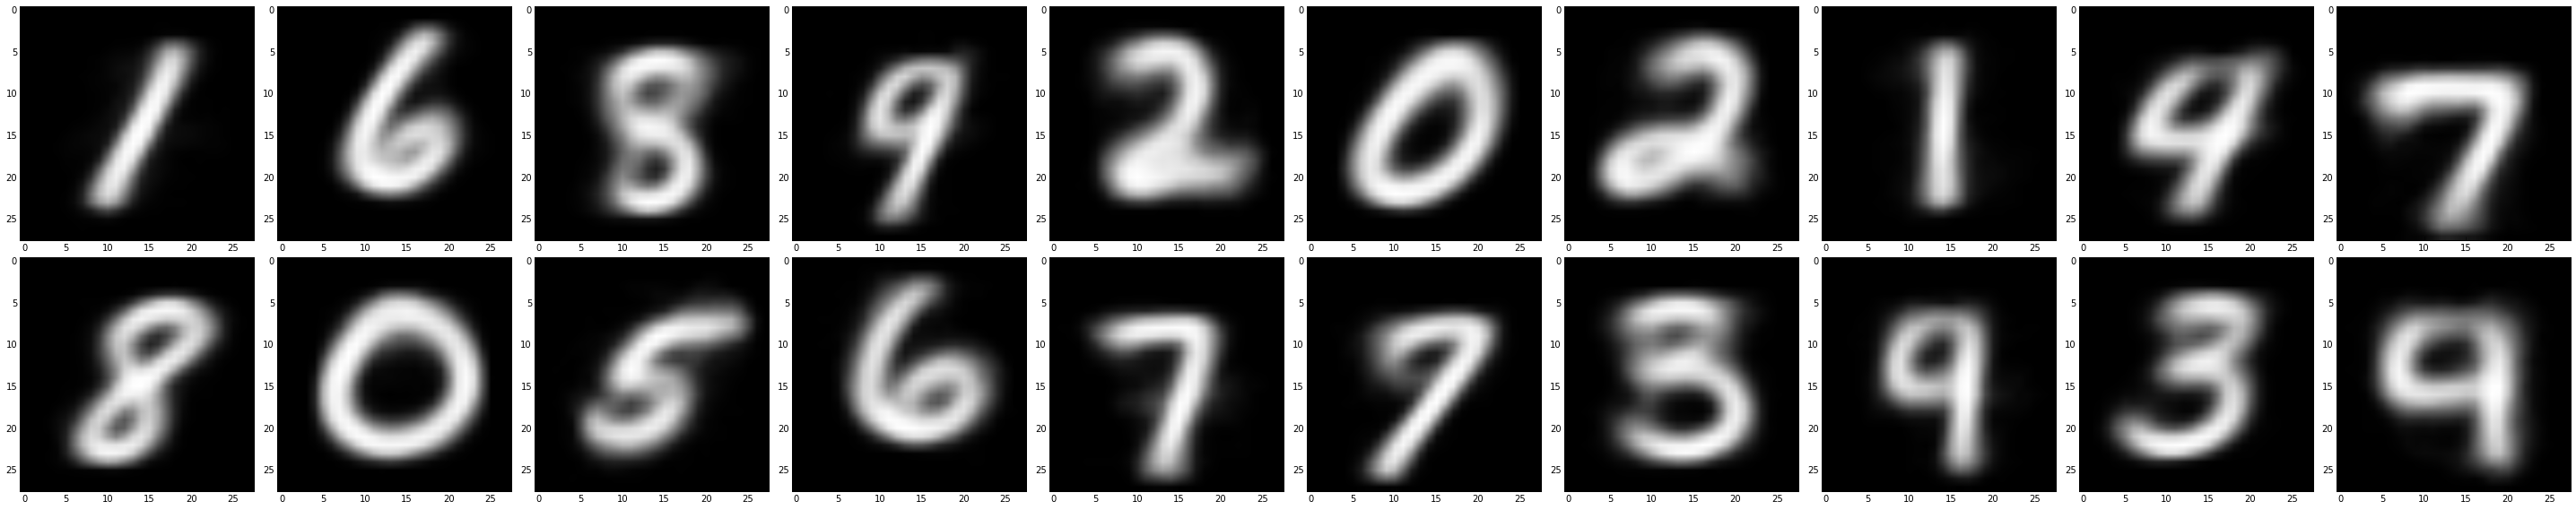

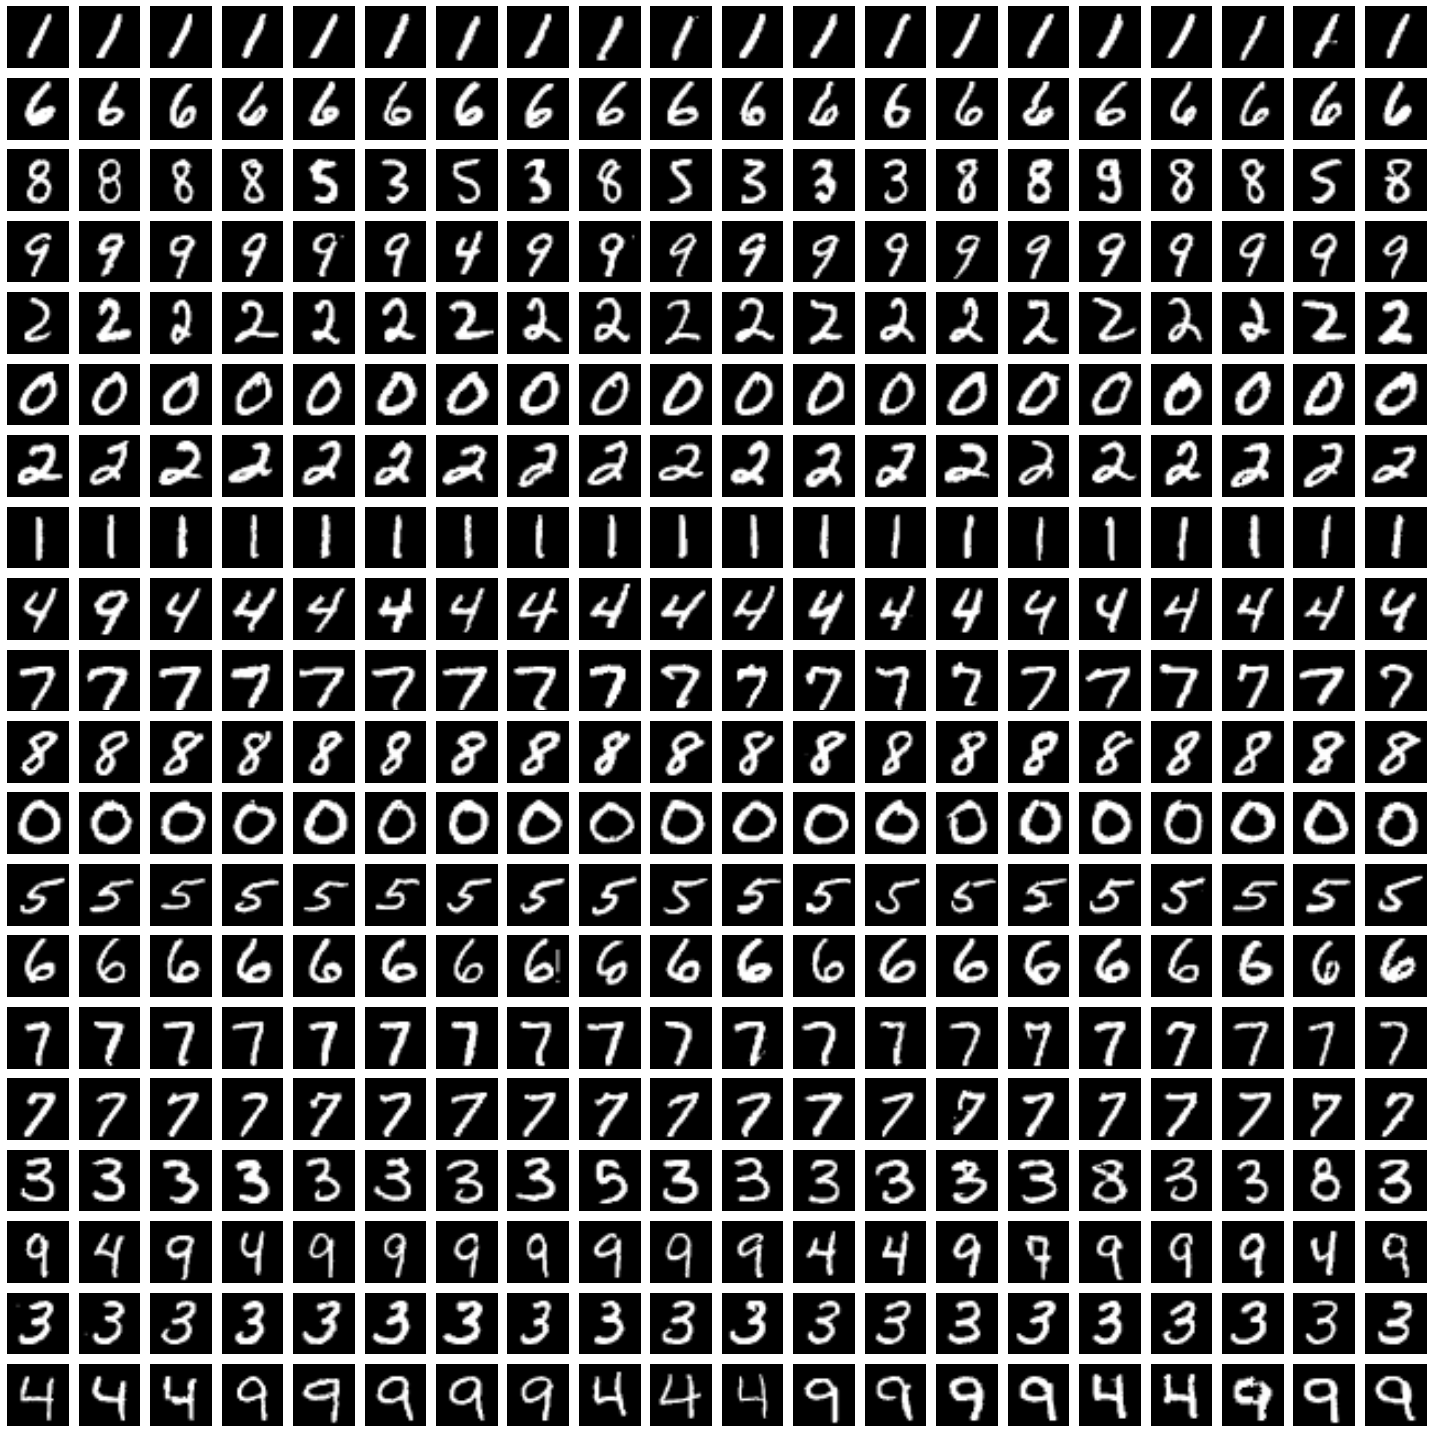

In [26]:
K = 20
D = 20
KMeansClassifier = KMeans(K=K, useKMeansPP=True)
KMeansClassifier.fit(pics)
KMeansClassifier.create_image_from_array(KMeansClassifier.centroids)
KMeansClassifier.get_representative_images(D=D, figsize = (20,20))

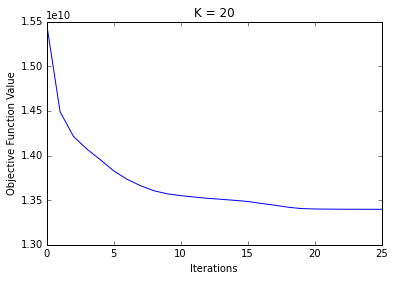

In [27]:
plt.plot(range(len(KMeansClassifier.objectives)), KMeansClassifier.objectives)
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("K = %d" %KMeansClassifier.K)
plt.show()

# K = 10, D = 10, K++ = False

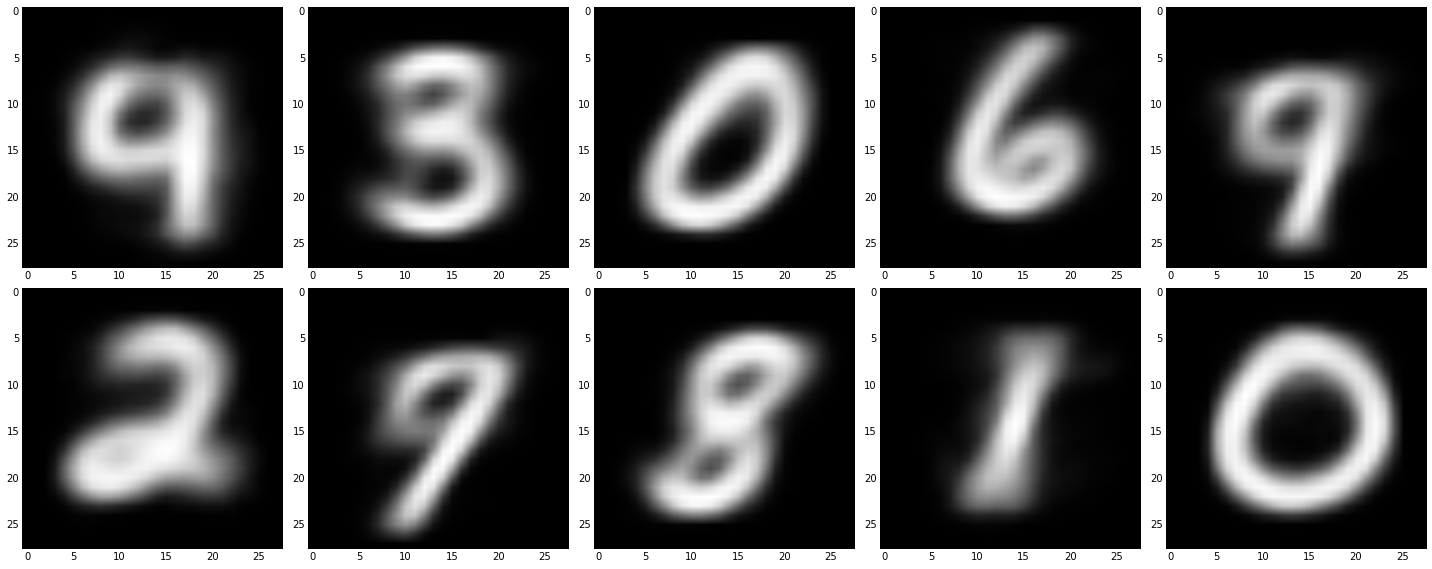

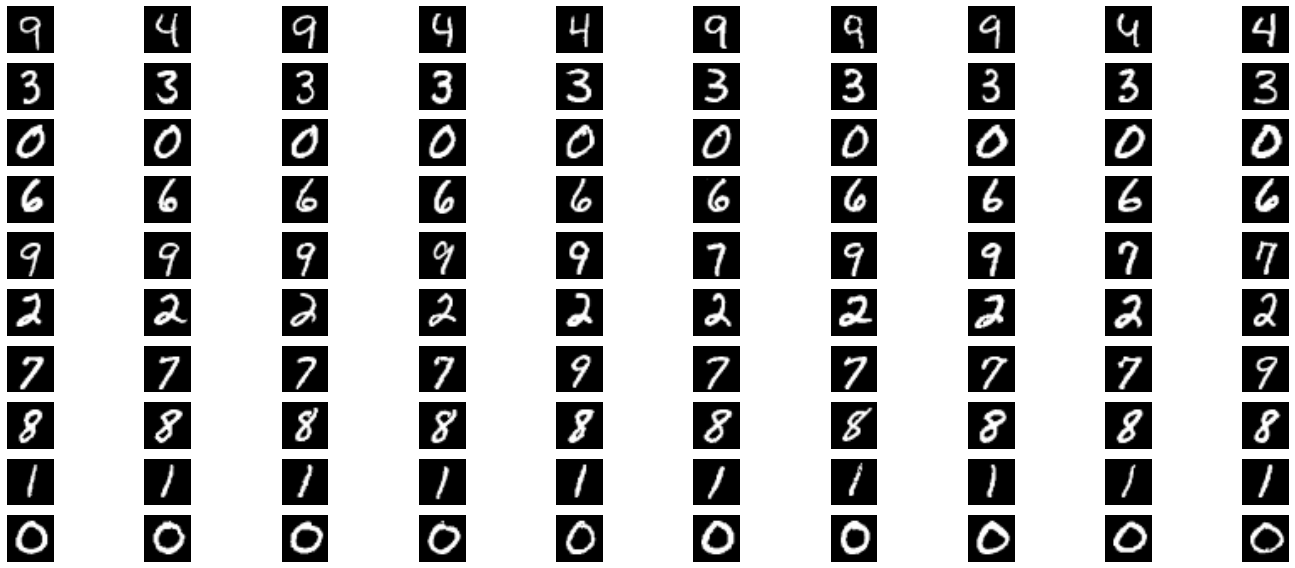

In [33]:
K = 10
D = 10
KMeansClassifier = KMeans(K=K, useKMeansPP=False)
KMeansClassifier.fit(pics)
KMeansClassifier.create_image_from_array(KMeansClassifier.centroids)
KMeansClassifier.get_representative_images(D=D, figsize = (2*K, 8))

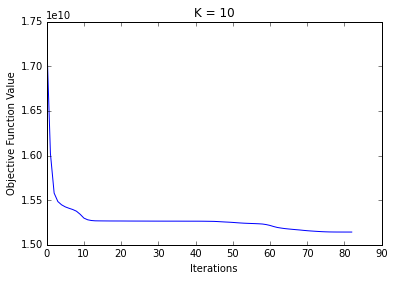

In [34]:
plt.plot(range(len(KMeansClassifier.objectives)), KMeansClassifier.objectives)
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("K = %d" %KMeansClassifier.K)
plt.show()

# K = 2, D = 10, K++ = False

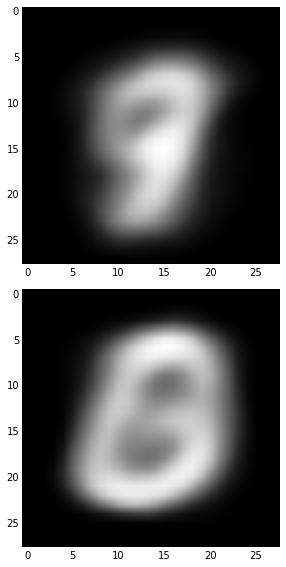

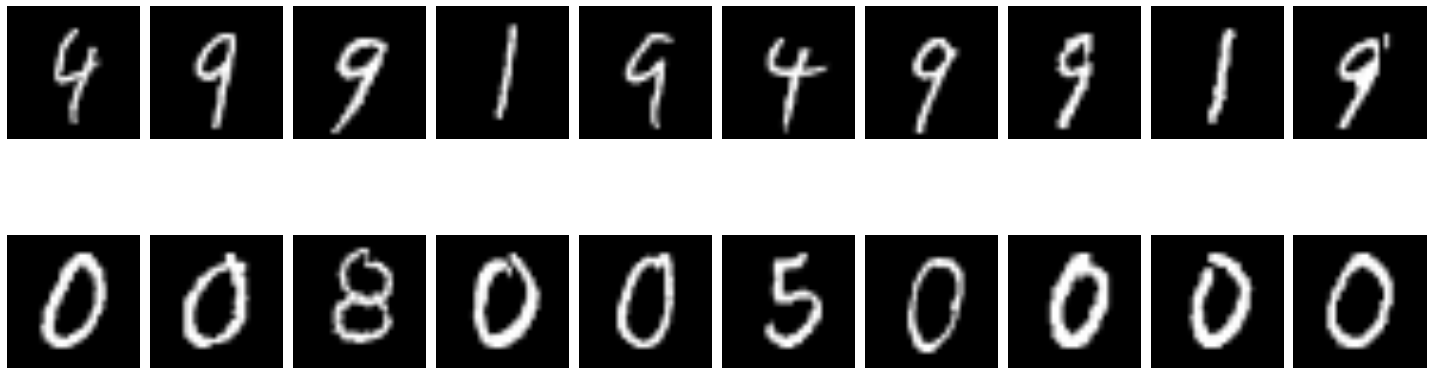

In [37]:
K = 2
D = 10
KMeansClassifier = KMeans(K=K, useKMeansPP=False)
KMeansClassifier.fit(pics)
KMeansClassifier.create_image_from_array(KMeansClassifier.centroids)
KMeansClassifier.get_representative_images(D=D, figsize = (2*D, 8))

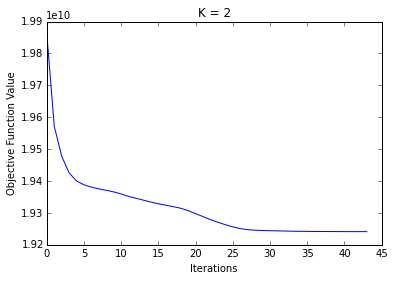

In [38]:
plt.plot(range(len(KMeansClassifier.objectives)), KMeansClassifier.objectives)
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.title("K = %d" %KMeansClassifier.K)
plt.show()